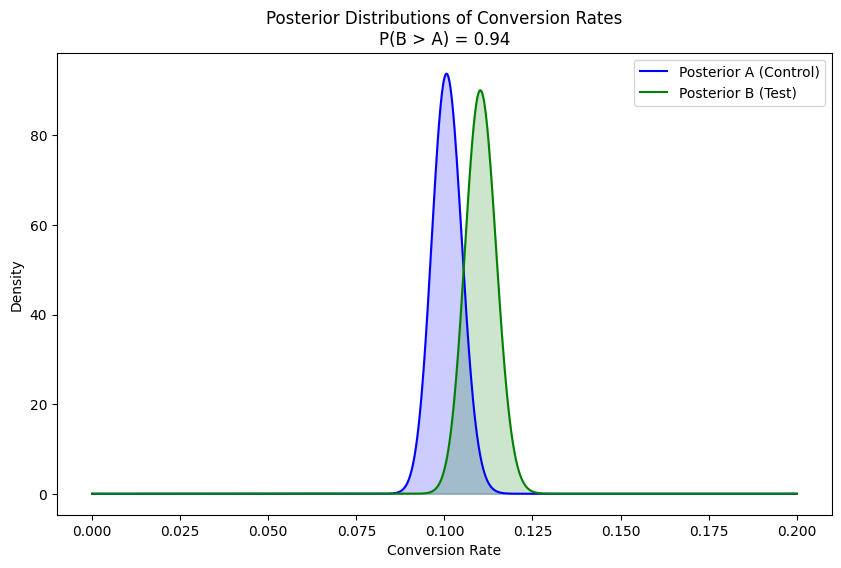

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom
from tqdm import tqdm

from experimentation.plotting import plot_pvalues


def prob_b_better(alpha_a, beta_a, alpha_b, beta_b):
    n_samples = 10_000
    samples_A = np.random.beta(alpha_a, beta_a, n_samples)
    samples_B = np.random.beta(alpha_b, beta_b, n_samples)
    # Probability that B's conversion rate is greater than A's
    prob_B_better_A = np.mean(samples_B > samples_A)
    return prob_B_better_A


visitors = 5_000
np.random.seed(171)
conversions_A = binom.rvs(n=visitors, p=0.1)
conversions_B = binom.rvs(n=visitors, p=0.11)

alpha_prior, beta_prior = 1, 1

alpha_post_A, beta_post_A = (
    conversions_A + alpha_prior,
    visitors - conversions_A + beta_prior,
)
alpha_post_B, beta_post_B = (
    conversions_B + alpha_prior,
    visitors - conversions_B + beta_prior,
)


prob_B_better_A = prob_b_better(alpha_post_A, beta_post_A, alpha_post_B, beta_post_B)

# Plotting the posterior distributions for A and B
x = np.linspace(0, 0.2, 1000)
posterior_A = beta.pdf(x, alpha_post_A, beta_post_A)
posterior_B = beta.pdf(x, alpha_post_B, beta_post_B)

plt.figure(figsize=(10, 6))
plt.plot(x, posterior_A, label="Posterior A (Control)", color="blue")
plt.plot(x, posterior_B, label="Posterior B (Test)", color="green")
plt.fill_between(x, posterior_A, color="blue", alpha=0.2)
plt.fill_between(x, posterior_B, color="green", alpha=0.2)

plt.title(
    f"Posterior Distributions of Conversion Rates\nP(B > A) = {prob_B_better_A:.2f}"
)
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

In [2]:
np.random.seed(171)
alpha_prior, beta_prior = 1, 1

n_experiments = 1_000
b_values = []
b_values_null = []
for _ in tqdm(range(n_experiments)):
    conversions_A = binom.rvs(n=visitors, p=0.1)
    conversions_B = binom.rvs(n=visitors, p=0.11)
    conversions_A2 = binom.rvs(n=visitors, p=0.1)
    alpha_post_A, beta_post_A = (
        conversions_A + alpha_prior,
        visitors - conversions_A + beta_prior,
    )
    alpha_post_B, beta_post_B = (
        conversions_B + alpha_prior,
        visitors - conversions_B + beta_prior,
    )
    alpha_post_A2, beta_post_A2 = (
        conversions_A2 + alpha_prior,
        visitors - conversions_A2 + beta_prior,
    )

    prob_B_better_A = prob_b_better(
        alpha_post_A, beta_post_A, alpha_post_B, beta_post_B
    )
    prob_A2_better_A = prob_b_better(
        alpha_post_A, beta_post_A, alpha_post_A2, beta_post_A2
    )
    b_values.append(1 - prob_B_better_A)
    b_values_null.append(1 - prob_A2_better_A)

100%|██████████| 1000/1000 [00:03<00:00, 267.18it/s]


(<Figure size 1000x500 with 2 Axes>,
 (<Axes: xlabel='p-value'>, <Axes: xlabel='p-value', ylabel='CDF'>))

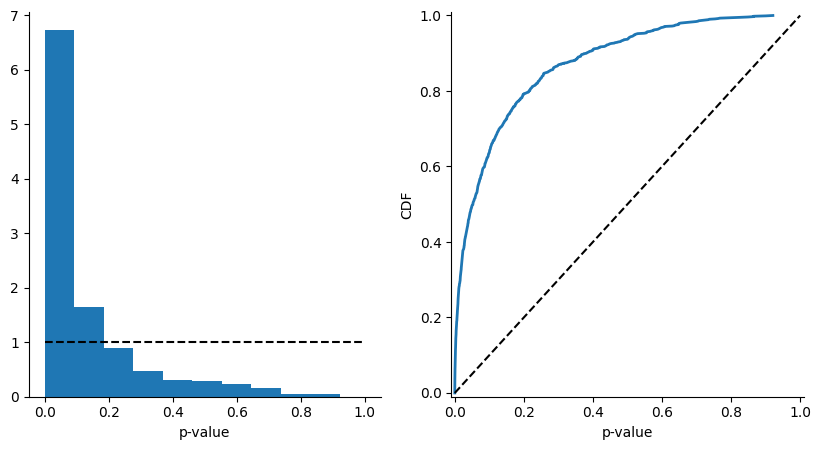

In [3]:
plot_pvalues(b_values)

(<Figure size 1000x500 with 2 Axes>,
 (<Axes: xlabel='p-value'>, <Axes: xlabel='p-value', ylabel='CDF'>))

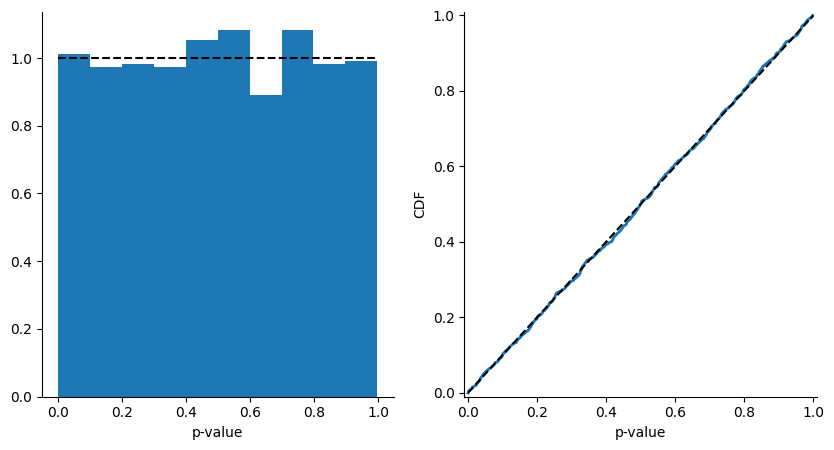

In [4]:
plot_pvalues(b_values_null)